1a) 

Load the SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of
features (song properties) in the dataset.

Hint: you may use the Python module Pandas and its function read_csv.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("SpotifyFeatures.csv")
df.shape

(232725, 18)

1b) 

Retrieve all samples belonging to the two genres (Pop and Classical) and create labels for the samples i.e: ’Pop’ = 1, ’Classical’ = 0.   

Report how many samples belongs to the two classes. 

For this dataset you should be able to separate the two classes by using two features, namely ’liveness’ and ’loudness’.

In [5]:
# Assign a new feature --> Assign value 1 if Pop --> Assign value 0 if Classical
df['is_pop'] = np.where(df['genre'] == 'Pop', 1, 0)

# Remove unwanted features
df = df[['genre', 'liveness', 'loudness', 'is_pop']]
# Get all samples that has pop and classical as their genre
df = df[df['genre'].isin(['Pop', 'Classical'])]

# Two separate DataFrames containing Pop and Classical songs
pop_songs = df[df['genre'] == 'Pop']
classical_songs = df[df['genre'] == 'Classical']

print(f"Number of Pop songs: {pop_songs.shape[0]}") # 9386 pop songs (samples)
print(f"Number of Classical songs: {classical_songs.shape[0]}") # 9256 classical songs (samples)


Number of Pop songs: 9386
Number of Classical songs: 9256


1c) Make 2 numpy arrays. 

--> The first array will be the matrix with songs along the rows and songs’ features ("liveness" and "loudness") as columns. This will be the input of our machine learning method.

--> The second array will the vector with the songs’ genre (labels or target we want to learn). 

Create a training and test set by splitting the dataset. Use an 80% 20% split between the training
and test set. Split the data per class so that you keep the same class distribution in the training and test
set

In [19]:

# Randomly shuffling the data separately --> removing original indices and assigning a new one
pop_songs = pop_songs.sample(frac=1, random_state=42).reset_index(drop=True)
classical_songs = classical_songs.sample(frac=1, random_state=42).reset_index(drop=True)

# Creating separate ratios for the two classes to keep the distribution
pop_training_ratio = int(len(pop_songs) * 0.8)
classical_training_ratio = int(len(classical_songs) * 0.8)
print(f"Pop songs training ratio {pop_training_ratio}")
print(f"Classical songs training ratio {classical_training_ratio}")

# Splitting pop data (Training data and testing data)
pop_train = pop_songs.iloc[:pop_training_ratio]
pop_test = pop_songs.iloc[pop_training_ratio:]

# Splitting classical data (Training data and testing data)
classical_train = classical_songs.iloc[:classical_training_ratio]
classical_test = classical_songs.iloc[classical_training_ratio:]


# Adding the training data and the test data together
train_data = pd.concat([pop_train, classical_train]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([pop_test, classical_test]).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features from the labels
X_train = train_data.drop(columns='is_pop').values
X_test = test_data.drop(columns='is_pop').values

y_train = train_data['is_pop'].values
y_test = test_data['is_pop'].values
print(pop_songs)

Pop songs training ratio 7508
Classical songs training ratio 7404
     genre  liveness  loudness  is_pop
0      Pop    0.1120   -14.601       1
1      Pop    0.3510    -4.969       1
2      Pop    0.5750    -6.786       1
3      Pop    0.0829    -6.526       1
4      Pop    0.1840    -3.534       1
...    ...       ...       ...     ...
9381   Pop    0.2310    -4.812       1
9382   Pop    0.6290    -7.592       1
9383   Pop    0.1210    -3.080       1
9384   Pop    0.3770    -3.788       1
9385   Pop    0.2510    -6.374       1

[9386 rows x 4 columns]


1d) 

Plot he samples on the liveness vs loudness plane, with a different color for each class. From the plot, will the classification be an easy task? why?




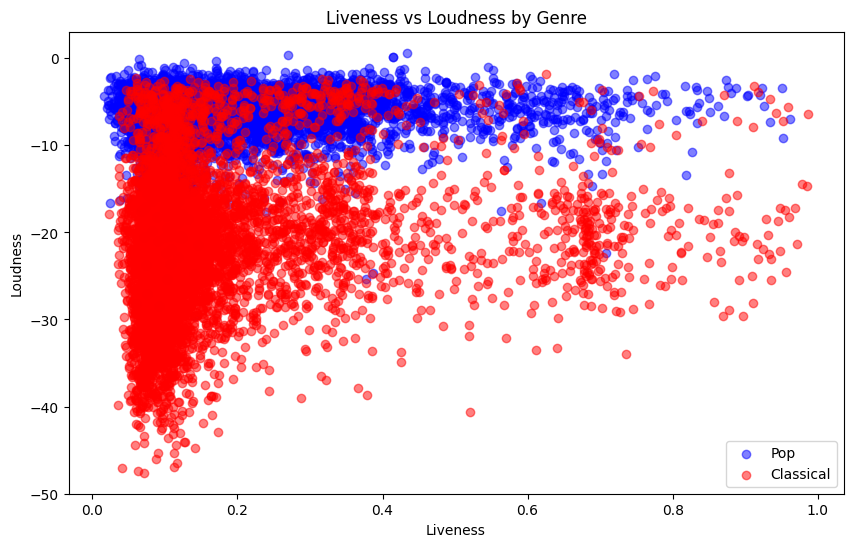

In [166]:
import matplotlib.pyplot as plt

# Extract liveness and loudness columns for plotting
liveness = X_train[:, 1] 
loudness = X_train[:, 2] 

# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot for Pop songs (is_pop = 1)
plt.scatter(liveness[y_train == 1], loudness[y_train == 1], color='blue', label='Pop', alpha=0.5)

# Scatter plot for Classical songs (is_pop = 0)
plt.scatter(liveness[y_train == 0], loudness[y_train == 0], color='red', label='Classical', alpha=0.5)

# Labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness by Genre')
plt.legend()

# Show the plot
plt.show()
